In [2]:
import os
os.chdir('..')

In [18]:
from pump_controller import PumpController, SilicoPumpController, visualize_rgb, visualize_candidates
from pump_controller import get_serial_port, list_serial_ports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Functions

In [4]:
# Difference between mixed and target colors:
def color_difference(mixed_color, target_color):
    # Calculate the sum of root mean squared differences between mixed color and target color
    rmse = np.sqrt(np.mean((mixed_color - target_color)**2, axis=-1))
    return np.sum(rmse)

# Silico

In [12]:
# Create Instance
silicobot = SilicoPumpController(noise_std=3)

In [13]:
# Set Target
demo_target_mixture = [0.4, 0.4, 0.1, 0.1]
silicobot.change_target(demo_target_mixture)

Silico target changed to [127.28918933 131.38314157  24.06859181]. Created by [0.4, 0.4, 0.1, 0.1].


array([127.28918933, 131.38314157,  24.06859181])

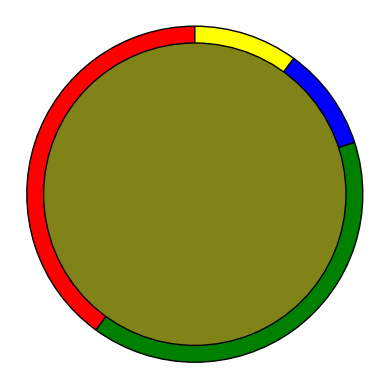

In [25]:
# Visualize Target
visualize_rgb(mixture = silicobot.target_mixture, rgb = silicobot.target_color, pump_controller=silicobot, target = None)

In [21]:
# Mix Color
test_mixture = [0.2, 0.4, 0.3, 0.1]
measurement = silicobot.mix_color(test_mixture)
print(measurement)

[ 75.75168184 122.11133252  74.7804765 ]


In [22]:
# Calculate Score
error_score = color_difference(measurement, silicobot.target_color)
print(error_score)

42.086325447442846


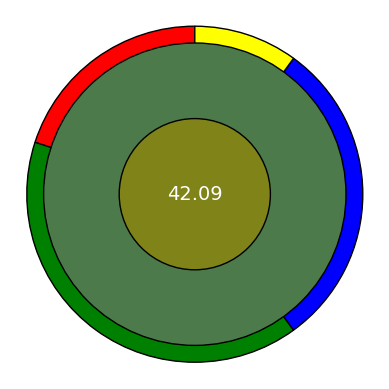

In [23]:
# Visualize mixed color
visualize_rgb(mixture = test_mixture, rgb = measurement, pump_controller=silicobot, score = error_score)

### Multiple Colors Plot

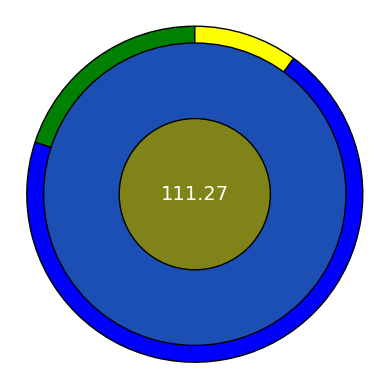

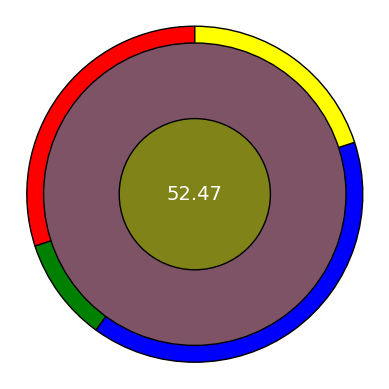

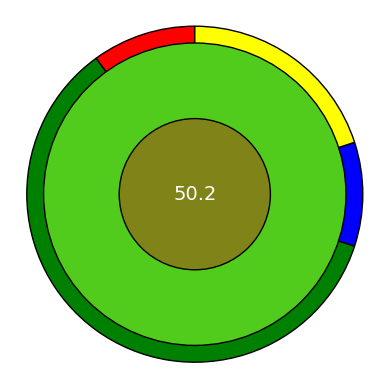

In [26]:
# Mix Multiple Colors
mixtures = [[0.0, 0.2, 0.7, 0.1],
            [0.3, 0.1, 0.4, 0.2],
            [0.1, 0.6, 0.1, 0.2]]

measurements = []
targets = []
scores = []

for color_mixture in mixtures:
    color_measurement = silicobot.mix_color(color_mixture)
    score = color_difference(color_measurement, silicobot.target_color)

    measurements.append(color_measurement)
    targets.append(silicobot.target_color)
    scores.append(score)

    visualize_rgb(mixture = color_mixture, rgb = color_measurement,
                  pump_controller = silicobot, score = score)


In [27]:
data = [mixtures, measurements, targets, scores]
data = [np.array(col) for col in data]

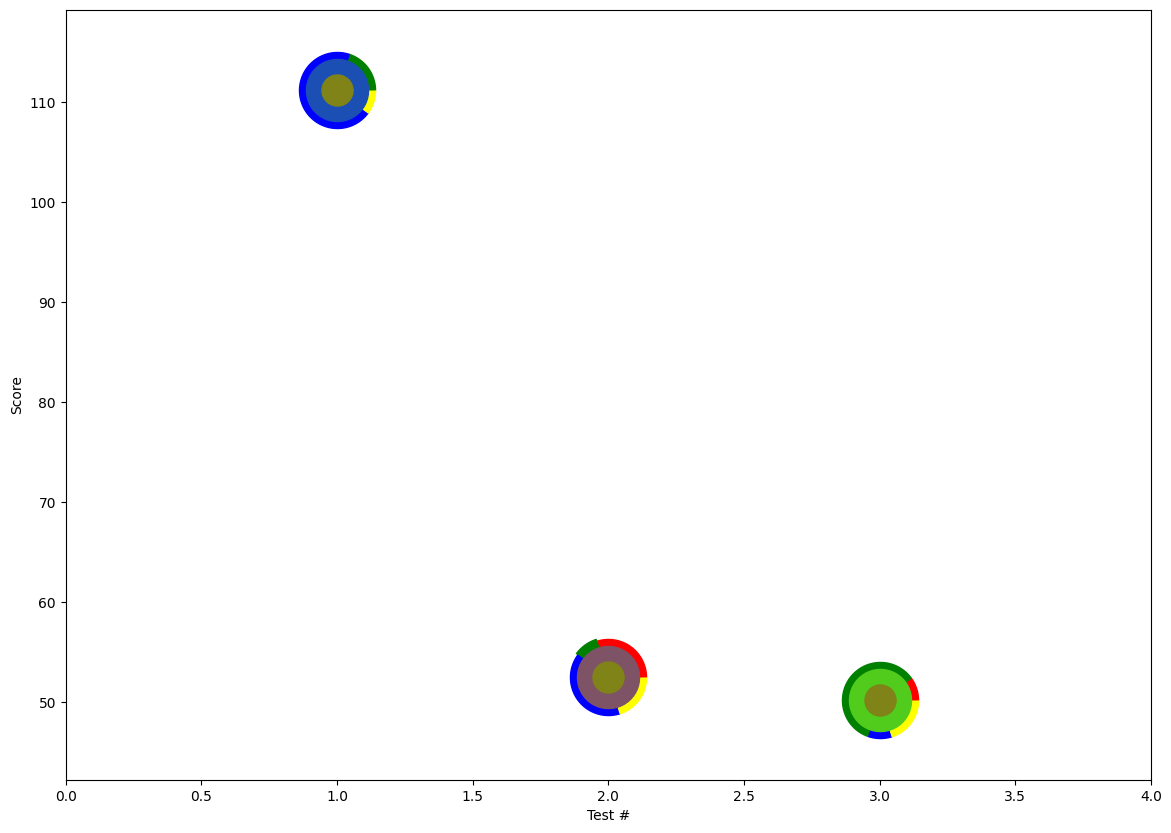

In [28]:
visualize_candidates(data)

# Arduino

In [19]:
# Create Instance
arduinobot = PumpController(get_serial_port(), cell_volume = 20.0, drain_time=15.0)

Serial port /dev/cu.usbserial-1420 opened at baud rate 9600
Arduino is ready


In [21]:
arduinobot.purge_pump('D', 5)

Sent from PC -- TEST STR -- <Mix,8,5>
Reply Received  Msg Mix,8,5 Time 199


In [22]:
# Prime Pumps

for pump in ['R', 'G', 'B', 'Y', 'W']:

    arduinobot.purge_pump(pump, 5)
    time.sleep(7)

    arduinobot.purge_pump('D', 5)
    time.sleep(7)

Sent from PC -- TEST STR -- <Mix,2,5>
Reply Received  Msg Mix,2,5 Time 245
Sent from PC -- TEST STR -- <Mix,8,5>
Reply Received  Msg Mix,8,5 Time 258
Sent from PC -- TEST STR -- <Mix,3,5>
Reply Received  Msg Mix,3,5 Time 272
Sent from PC -- TEST STR -- <Mix,8,5>
Reply Received  Msg Mix,8,5 Time 286
Sent from PC -- TEST STR -- <Mix,4,5>
Reply Received  Msg Mix,4,5 Time 300
Sent from PC -- TEST STR -- <Mix,8,5>
Reply Received  Msg Mix,8,5 Time 313
Sent from PC -- TEST STR -- <Mix,6,5>
Reply Received  Msg Mix,6,5 Time 327
Sent from PC -- TEST STR -- <Mix,8,5>
Reply Received  Msg Mix,8,5 Time 341
Sent from PC -- TEST STR -- <Mix,7,5>
Reply Received  Msg Mix,7,5 Time 355
Sent from PC -- TEST STR -- <Mix,8,5>
Reply Received  Msg Mix,8,5 Time 368


In [37]:
col_list = np.random.rand(4)

In [38]:
col_list = np.array(col_list)

In [39]:
col_list = np.divide(col_list, np.sum(col_list))
print(col_list)
print(np.sum(col_list))

[0.16585784 0.34420171 0.18899771 0.30094274]
1.0
